In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("D:\\Courses\\Machine Learning(ML)\\Machine Learning(ML)\\Data set\\pizza_v2.CSV")

In [4]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


Checking the shape of the dataset

In [5]:
data.shape

(129, 9)

Checking the basic information about the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


Check Null Values in the DataSet

In [7]:
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

Check Duplicated Values in the DataSet

In [8]:
data.duplicated().sum()

2

Dropping duplicated rows

In [9]:
data.drop_duplicates(inplace=True)


In [10]:
data.duplicated().sum()

0

Number of unique values present in each feature column

In [11]:
data.nunique()

company             5
price_rupiah       43
diameter           12
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

Overall Statistics About The Dataset

In [13]:
data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,127,127,127,127,127,127,127,127,127
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,28,30,41,76,84,71


Data Preprocessing

In [14]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


Removing "price_rupiah" into price 

In [15]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [16]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


Removing "Rp" and "inch" from rows and changing datatype

In [17]:
data['diameter'] = data['diameter'].str.replace('inch', '').str.replace(',', '').astype('float64') 
data['price'] = data['price'].str.replace('Rp', '').str.replace(',', '').astype('float64')
data.loc[:, ['price', 'diameter']]

,price,diameter
0,235000.0,22.0
1,198000.0,20.0
2,120000.0,16.0
3,155000.0,14.0
4,248000.0,18.0
...,...,...
124,39000.0,8.5
125,72000.0,12.0
126,99000.0,14.0
127,44000.0,8.5


Indonesian Rupiah covert into LKR

In [18]:
def convert(value):
    return value*0.019

In [19]:
data['price']=data['price'].apply(convert)

In [20]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,4465.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,3762.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,2280.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,2945.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,4712.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


Correlation matrix

<Axes: >

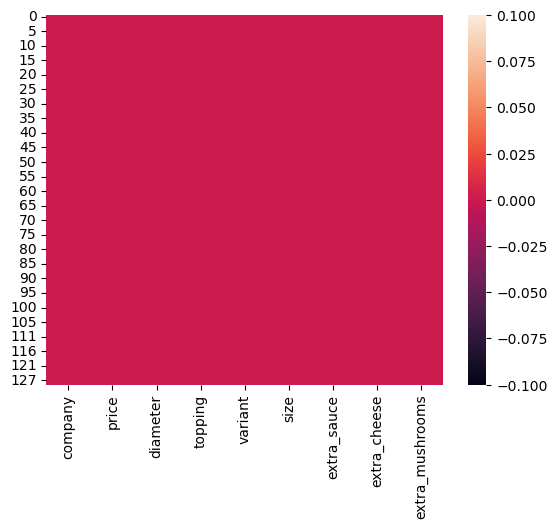

In [24]:
sns.heatmap(data.isnull())

Bivariate Analysis


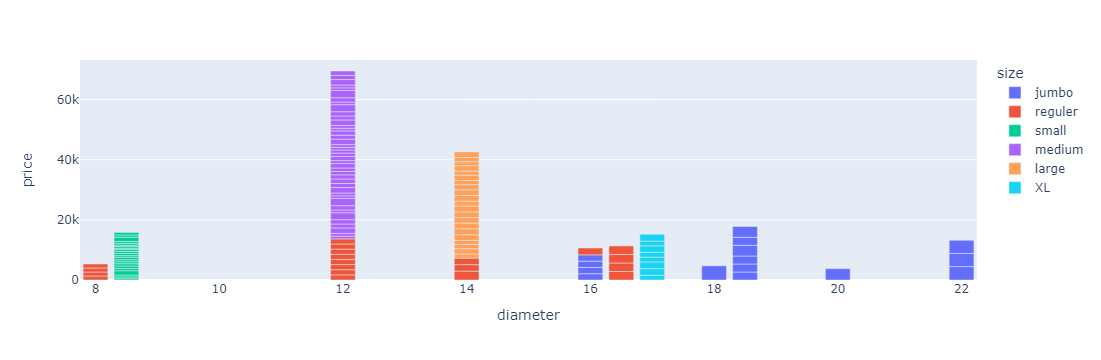

<Figure size 800x900 with 0 Axes>

In [31]:
fig = px.bar(data, x='diameter', y='price', color="size")
plt.figure(figsize=(8,9))
fig.show()

<Axes: xlabel='size', ylabel='price'>

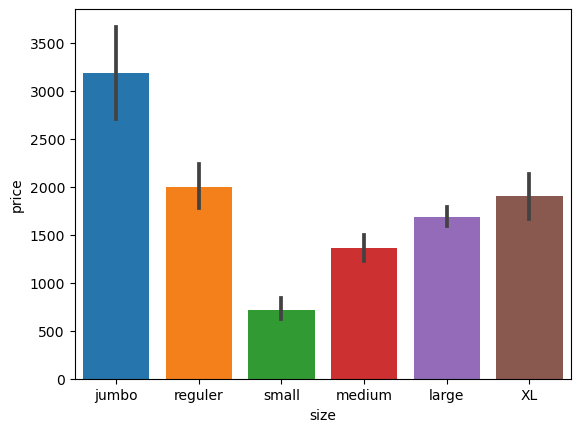

In [39]:
sns.barplot(x = 'size', y = 'price', data = data,  saturation=0.90)

<Axes: xlabel='company', ylabel='price'>

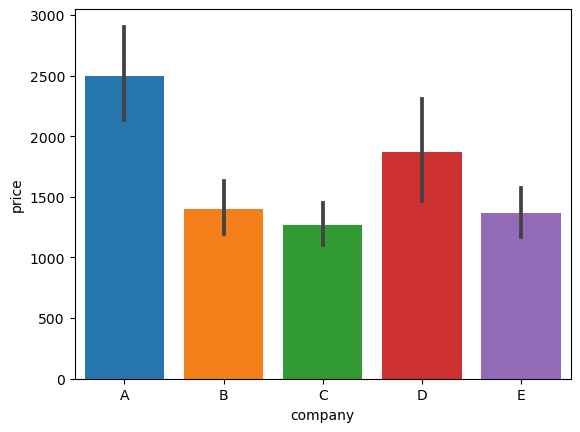

In [40]:
sns.barplot(x = 'company', y = 'price', data = data,  saturation=0.90)

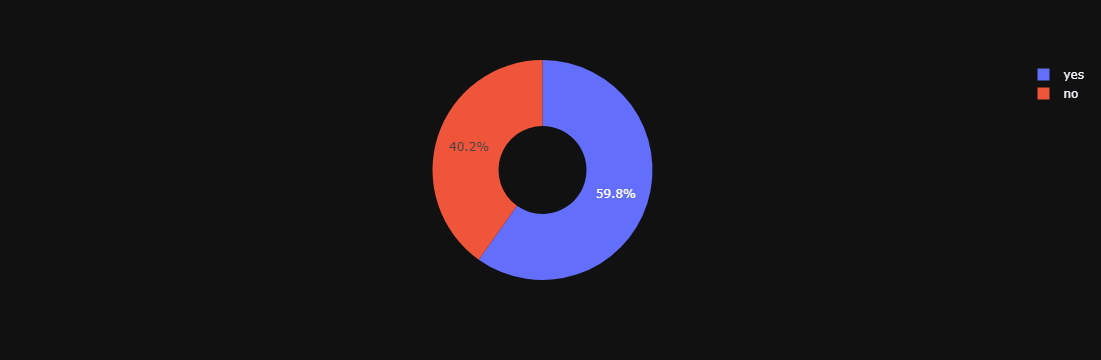

In [41]:
fig =  px.pie (data, names = "extra_sauce", hole = 0.4, template = "plotly_dark")
fig.show ()

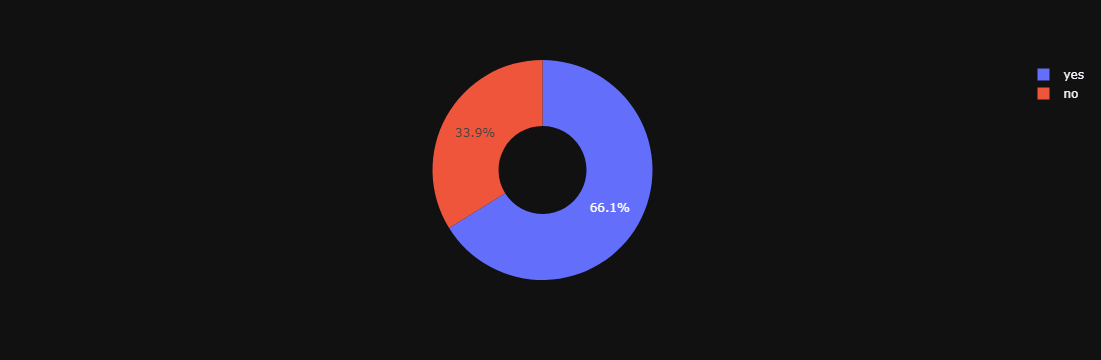

In [42]:
fig =  px.pie (data, names = "extra_cheese", hole = 0.4, template = "plotly_dark")
fig.show ()

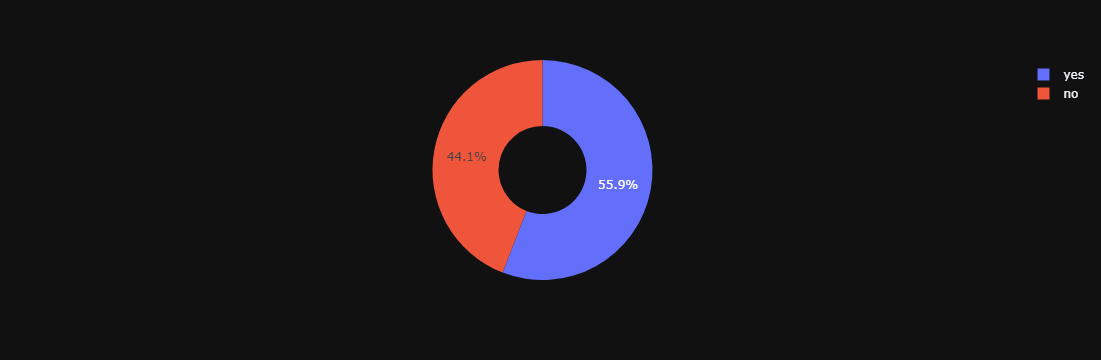

In [43]:
fig =  px.pie (data, names = "extra_mushrooms", hole = 0.4, template = "plotly_dark")
fig.show ()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          127 non-null    object 
 1   price            127 non-null    float64
 2   diameter         127 non-null    float64
 3   topping          127 non-null    object 
 4   variant          127 non-null    object 
 5   size             127 non-null    object 
 6   extra_sauce      127 non-null    object 
 7   extra_cheese     127 non-null    object 
 8   extra_mushrooms  127 non-null    object 
dtypes: float64(2), object(7)
memory usage: 9.9+ KB


Data Analysis

In [32]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [33]:
data['company'].value_counts()

company
C    30
E    28
A    25
B    24
D    20
Name: count, dtype: int64

In [34]:
data['diameter'].value_counts()

diameter
12.0    49
14.0    24
8.5     22
17.0     8
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: count, dtype: int64

In [35]:
data['topping'].value_counts()

topping
chicken         28
mushrooms       22
mozzarella      20
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: count, dtype: int64

In [36]:
data['variant'].value_counts()

variant
classic              30
meat_lovers          10
double_mix           10
crunchy              10
double_decker         9
new_york              8
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: count, dtype: int64

In [37]:
data['size'].value_counts()

size
medium     41
small      22
large      21
reguler    20
jumbo      15
XL          8
Name: count, dtype: int64

Find the most expensive pizza

In [46]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,4712.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


Find the most cheapest pizza

In [47]:
data[data['price'].min()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
25,B,446.5,8.5,mozzarella,classic,small,yes,no,no
89,D,446.5,8.5,mozzarella,classic,small,yes,no,yes
100,E,446.5,8.5,mozzarella,classic,small,yes,no,yes


Multivariate Analysis

sns.pairplot(data)

Removing Outliers

In [49]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,2090.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,2090.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,2090.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,2090.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [52]:

data = data.drop(data.index[[6,11,16,80]])

In [53]:
data.shape

(123, 9)

In [ ]:
Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()
#Import the Models#
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [55]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [56]:
categorical_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [58]:
en=LabelEncoder()
for i in categorical_cols:
    data[i]=en.fit_transform(data[i])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          123 non-null    int32  
 1   price            123 non-null    float64
 2   diameter         123 non-null    float64
 3   topping          123 non-null    int32  
 4   variant          123 non-null    int32  
 5   size             123 non-null    int32  
 6   extra_sauce      123 non-null    int32  
 7   extra_cheese     123 non-null    int32  
 8   extra_mushrooms  123 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 6.2 KB


Splitting data

In [62]:
x = data.drop(['price'], axis=1)
y = data['price']



In [64]:
x.shape

(123, 8)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

Model Building

In [67]:
lr = LinearRegression()
lr.fit(x_train,y_train)

svm  = SVR()
svm.fit(x_train,y_train)

rf  = RandomForestRegressor()
rf.fit(x_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on Test Data

In [68]:
y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gbr.predict(x_test)
y_pred5 = xg.predict(x_test)

Evaluate the Algorithm

In [70]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [71]:
print(score1,score2,score3,score4,score5)

0.6391199071772931 -0.0843745995823646 0.7171098095577498 0.8098884752226965 0.7307406185441038


Save the Model

In [72]:
x = data.drop('price',axis=1)
y = data['price']

In [73]:
gbr = GradientBoostingRegressor()

In [74]:
gbr.fit(x,y)

GradientBoostingRegressor()

In [75]:
import joblib

In [76]:
joblib.dump(gbr,'pizza_price_predict')

['pizza_price_predict']

In [77]:
model = joblib.load('pizza_price_predict')

In [86]:
import pandas as pd
df = pd.DataFrame({
    'company':1,
    'diameter':22.0,
    'topping':2,
    'variant':8,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':1,
    'extra_mushrooms':1
},index=[0])

In [87]:
df

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,22.0,2,8,1,1,1,1


In [80]:
model.predict(data_new)

array([4408.61912233])

GUI

In [2]:
from tkinter import *
import joblib
import pandas as pd

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())

    model = joblib.load('pizza_price_model')
    df = pd.DataFrame({
    'company':p1,
    'diameter':p2,
    'topping':p3,
    'variant':p4,
    'size':p5,
    'extra_sauce':p6,
    'extra_cheese':p7,
    'extra_mushrooms':p8
},index=[0])
    result = model.predict(df)
    
    Label(master, text="Pizza Price is").grid(row=31)
    Label(master, text=result).grid(row=32)
    print("Pizza Price Prediction", result)
    
master =Tk()
master.title("Pizza Price Prediction Using Machine Learning")
label = Label(master,text = "Pizza Price Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Company Name").grid(row=1)
Label(master,text = "Enter Your Diameter of the Pizza").grid(row=2)
Label(master,text = "Topping").grid(row=3)
Label(master,text = "Variant").grid(row=4)
Label(master,text = "Size").grid(row=5)
Label(master,text = "extra_sauce [1:yes,0:No]").grid(row=6)
Label(master,text = "extra_cheese [1:yes,0:No] ").grid(row=7)
Label(master,text = "extra_mushrooms [1:yes,0:No]").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()